<a href="https://colab.research.google.com/github/patricioterraza/TelecomX_LATAM/blob/main/telecomx_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [1]:
#Importando Pandas
import pandas as pd

In [2]:
#Leyendo el dataset desde un archivo JSON
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

In [3]:
#Mostrando las 5 primeras filas de datos del dataframe
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
#Creando un nuevo dataframe con las columnas que contienen un JSON como valor
df_json = df[['customer','phone','internet','account']]

In [5]:
#Recorriendo las filas del nuevo dataframe
for columna in df_json:
  df_normalize = pd.json_normalize(df[columna]) #Normalizo la columna JSON
  df = pd.concat([df, df_normalize], axis=1) #Concateno las filas normalizadas al dataframe original
  df = df.drop(columns=[columna]) #Elimino la columna JSON nornalizada desde el dataframe original

In [6]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [8]:
#Muestro los Valores únicos para cada columna
for columna in df:
  print(f'{columna}: {pd.unique(df[columna])}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Cr

In [9]:
#Cuento valores en blanco de cada columna
for columna in df:
  print(df[columna].dtype)
  if(df[columna].dtype == 'object'):
    print(f'Hay {df[columna].str.isspace().sum()} valores en blanco en la columna {columna}')

object
Hay 0 valores en blanco en la columna customerID
object
Hay 0 valores en blanco en la columna Churn
object
Hay 0 valores en blanco en la columna gender
int64
object
Hay 0 valores en blanco en la columna Partner
object
Hay 0 valores en blanco en la columna Dependents
int64
object
Hay 0 valores en blanco en la columna PhoneService
object
Hay 0 valores en blanco en la columna MultipleLines
object
Hay 0 valores en blanco en la columna InternetService
object
Hay 0 valores en blanco en la columna OnlineSecurity
object
Hay 0 valores en blanco en la columna OnlineBackup
object
Hay 0 valores en blanco en la columna DeviceProtection
object
Hay 0 valores en blanco en la columna TechSupport
object
Hay 0 valores en blanco en la columna StreamingTV
object
Hay 0 valores en blanco en la columna StreamingMovies
object
Hay 0 valores en blanco en la columna Contract
object
Hay 0 valores en blanco en la columna PaperlessBilling
object
Hay 0 valores en blanco en la columna PaymentMethod
float64
obje

In [10]:
#Importndo numpy
import numpy as np

In [11]:
#Analizo el campo 'Charges.Total'

#Reemplaza los datos o valores en blanco de la columna 'Charges.Total' por 0, ya que es un total y debe expresarse en números
df['Charges.Total'] = df['Charges.Total'].replace(' ', '0')
df['Charges.Total'].str.isspace().sum()


np.int64(0)

In [12]:
#Convirtiendo la columna a 'Charges.Total' a float, ya que es un dato numérico y estaba escrito como string
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [14]:
#Analizo el campo 'Churn'

#Cuento las filas vacías en la columna 'Churn'
filas_vacias_Churn = df['Churn'] == ''
print(filas_vacias_Churn.sum())
print(f'La columna "Churn" tiene {filas_vacias_Churn.sum()} filas vacías')

224
La columna "Churn" tiene 224 filas vacías


In [15]:
#Reemplazo los valores vacíos por Nan, ya que no puedo determinar si pueden o no ser imputados o eliminados, o reemplazados
df['Churn'] = df['Churn'].replace('', np.nan)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Manejo de inconsistencias

In [17]:
#Muestro todas las colunas de dataframe
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [18]:
#Llvando a minúsculas las columnas del dataframe
df.columns=df.columns.str.lower()

In [19]:
df.head(20)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90


In [20]:
#Convirtiendo los string de todo el dataframe a minusculas
for columna in df:
  if(df[columna].dtype == 'object'):
    df[columna] = df[columna].str.lower()


In [21]:
df.head(20)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.60,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40
5,0013-mhzwf,no,female,0,no,yes,9,yes,no,dsl,...,no,no,yes,yes,yes,month-to-month,yes,credit card (automatic),69.40,571.45
6,0013-smeoe,no,female,1,yes,no,71,yes,no,fiber optic,...,yes,yes,yes,yes,yes,two year,yes,bank transfer (automatic),109.70,7904.25
7,0014-bmaqu,no,male,0,yes,no,63,yes,yes,fiber optic,...,no,no,yes,no,no,two year,yes,credit card (automatic),84.65,5377.80
8,0015-uocoj,no,female,1,no,no,7,yes,no,dsl,...,no,no,no,no,no,month-to-month,yes,electronic check,48.20,340.35
9,0016-qljis,no,female,0,yes,yes,65,yes,yes,dsl,...,yes,yes,yes,yes,yes,two year,yes,mailed check,90.45,5957.90


In [22]:
cuentas_diarias = df['charges.monthly'] /30
df['cuetas_diarias'] = cuentas_diarias
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuetas_diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


## Estandarización y transfromación de datos

In [23]:
# Reemplazar 'yes' por 1 y 'no' por 0 en las sigueintes columnas

df['partner'] = df['partner'].replace({'yes': 1, 'no': 0})

df['dependents'] = df['dependents'].replace({'yes': 1, 'no': 0})

df['phoneservice'] = df['phoneservice'].replace({'yes': 1, 'no': 0})

df['paperlessbilling'] = df['paperlessbilling'].replace({'yes': 1, 'no': 0})

df.head()

<ipython-input-23-cfd1e10388c9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['partner'] = df['partner'].replace({'yes': 1, 'no': 0})
<ipython-input-23-cfd1e10388c9>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dependents'] = df['dependents'].replace({'yes': 1, 'no': 0})
<ipython-input-23-cfd1e10388c9>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavio

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuetas_diarias
0,0002-orfbo,no,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,no,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,yes,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,yes,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,yes,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


#🔧 Transformación

#📊 Carga y análisis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   int64  
 5   dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   int64  
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


In [25]:
#El .describe() calcula y muestra estadísticas como el número de observaciones (count), el valor mínimo (min), el valor máximo (max),
#la media (mean), la desviación estándar (std), y los percentiles (25%, 50%, 75%) de las columnas numéricas

#También puedes obtener información de las columnas no numéricas (como cadenas de texto) utilizando describe() con el parámetro include='all' o include=['object'].
#Para las columnas de texto, describe() devolverá información como:
#count: Número de valores no nulos.
#unique: Número de valores únicos.
#top: El valor más frecuente.
#freq: La frecuencia del valor más frecuente.

df.describe(include='all')

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuetas_diarias
count,7267,7043,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267,...,7267,7267,7267,7267,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000
unique,7267,2,2,NaN,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,3,NaN,4,NaN,NaN,NaN
top,9995-hotoh,no,male,NaN,NaN,NaN,NaN,NaN,no,fiber optic,...,no,no,no,no,month-to-month,NaN,electronic check,NaN,NaN,NaN
freq,1,5174,3675,NaN,NaN,NaN,NaN,NaN,3495,3198,...,3195,3582,2896,2870,4005,NaN,2445,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.593230,NaN,64.720098,2277.182035,2.157337
std,NaN,NaN,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491265,NaN,30.129572,2268.648587,1.004319
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,0.000000,0.608333
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.425000,396.200000,1.180833
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.300000,1389.200000,2.343333
75%,NaN,NaN,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.875000,3778.525000,2.995833


In [26]:
# filtering the rows where Credit-Rating is Fair
#df_churn = df[df['churn'].str.contains('yes')]
#print(df_churn)
#print(df['col2'].isnull().sum())

# Reemplazar los valores nulos en 'churn' por 'no', ya que de acuerdo al métoo describe, es el valor que más se repite dentro de la columna.
#Además, se puede asumir que la falta del dato colije que el cliente sigue siendo parte de la empresa.

df['churn'] = df['churn'].fillna('no')

In [27]:
print(df['churn'].isnull().sum())

0


In [28]:
# Reemplazar 'yes' por 1 y 'no' por 0 en las columna churn
df['churn'] = df['churn'].replace({'yes': 1, 'no': 0})

<ipython-input-28-cbf95adb6d26>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn'] = df['churn'].replace({'yes': 1, 'no': 0})


In [29]:
# Filtrando las filas en que el valor de churn es 1 o 0 (si o no), y creandoi un dataframe para cada caso
df_churn_no = df[df['churn'] == 0]
df_churn_yes = df[df['churn'] == 1]

In [30]:
cantidad_yes = df_churn_yes['churn'].count()
cantidad_no = df_churn_no['churn'].count()
cantidad_yes

np.int64(1869)

In [31]:
#Importando la librería para crear gráficos
import matplotlib.pyplot as plt

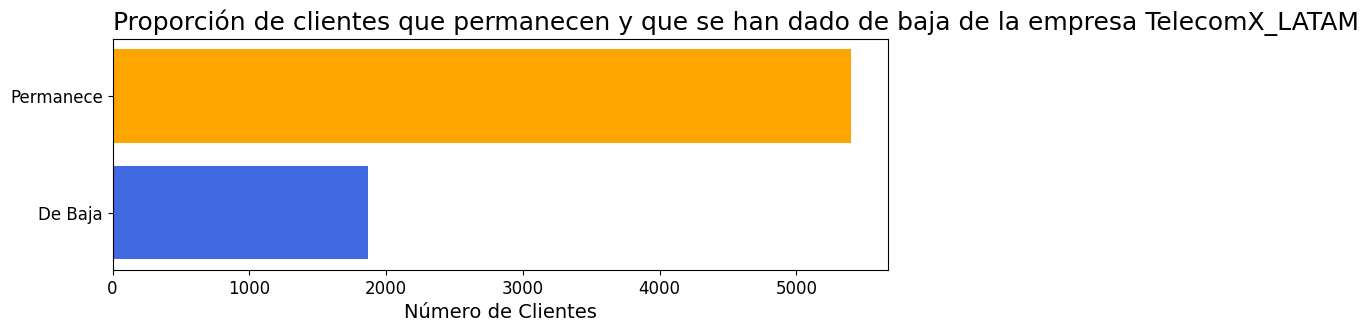

In [32]:
#Graficando Churn

colores = ['royalblue','orange','forestgreen','orchid',
           'purple','brown','slateblue','gray','olive',
           'navy','teal','tomato',]

fig, ax = plt.subplots(figsize=(10,3))

ax.barh(['De Baja', 'Permanece'], [cantidad_yes,cantidad_no],color=colores)
ax.set_title('Proporción de clientes que permanecen y que se han dado de baja de la empresa TelecomX_LATAM',loc='left',
            fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Número de Clientes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

In [84]:
#Distribución de la evasión: Selección por variables categóricas

#Género
cantidad_evasion_masculina = df_churn_yes[df_churn_yes['gender'] == 'male']['gender'].count()
cantidad_evasion_femenina = df_churn_yes[df_churn_yes['gender'] == 'female']['gender'].count()

#Tipo de Contrato (Contract: ['One year' 'Month-to-month' 'Two year'])
cantidad_evasion_contrato_oneyear =  df_churn_yes[df_churn_yes['contract'] == 'one year']['contract'].count()
cantidad_evasion_contrato_month_to_month = df_churn_yes[df_churn_yes['contract'] == 'month-to-month']['contract'].count()
cantidad_evasion_contrato_two_year = df_churn_yes[df_churn_yes['contract'] == 'two year']['contract'].count()

#Medio de pago (PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)' 'Bank transfer (automatic)'])
evasion_medios_pago = []
for value in pd.unique(df['paymentmethod']):
  cantidad = df_churn_yes[df_churn_yes['paymentmethod'] == value]['paymentmethod'].count()
  evasion_medios_pago.append({value:cantidad})

df_evasion_medios_pago = pd.DataFrame(evasion_medios_pago)
df_evasion_medios_pago = df_evasion_medios_pago.fillna(0)
df_evasion_medios_pago

df_transpuesto = df_evasion_medios_pago.T
df_transpuesto









,0,1,2,3
mailed check,308.0,0.0,0.0,0.0
electronic check,0.0,1071.0,0.0,0.0
credit card (automatic),0.0,0.0,232.0,0.0
bank transfer (automatic),0.0,0.0,0.0,258.0


#📄Informe final